To Do:
- [ ] write function to pull h5 data

In [15]:
# importing packages
import numpy as np
import h5py
import matplotlib.pyplot as plt
from src import io

In [16]:
exp_date = '250730'
exp_num = '1001'

experiment_path = io.get_experiment(exp_date, exp_num)
supervox_path = io.get_file(experiment_path, 'processed', '*supervoxels.h5')
labels_path = io.get_file(experiment_path, 'processed', '*labels.h5')
print(supervox_path, labels_path)

/Volumes/AhmedLab/princess/data/250730_1001/processed/250730_1001_supervoxels.h5 /Volumes/AhmedLab/princess/data/250730_1001/processed/TSeries-07302025-1001_channel_1_labels.h5


In [17]:
# open h5 and pull data
with h5py.File(labels_path, 'r') as labels_hf:
    cluster_labels = labels_hf['labels'][...]

with h5py.File(supervox_path,'r') as supervox_hf:
    ca_signal = supervox_hf['ca_signal'][...]
    fictrac_sp = supervox_hf['smoothed_speed'][...]
    fictrac_t = supervox_hf['fictrac_time'][...]
    camera_fr = supervox_hf['camera_fr'][...]
    scope_fr = supervox_hf['scope_fr'][...]
    brain_dim = supervox_hf['brain_dimensions'][...]

# maui time conversions
frames = [x for x in range(1, ca_signal.shape[-1])]
volume_per_s = scope_fr/ca_signal.shape[0] # volume rate in Hz
maui_time = [0] + [x / volume_per_s for x in frames]

# fictrac time conversions
fic_time = fictrac_t / camera_fr

In [29]:
reshape = brain_dim.reshape(-1)
print(reshape)

[257 175  31 670]


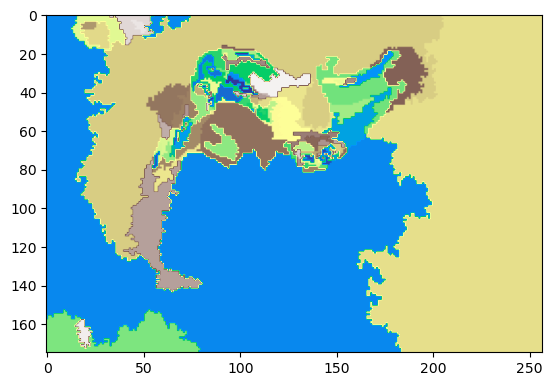

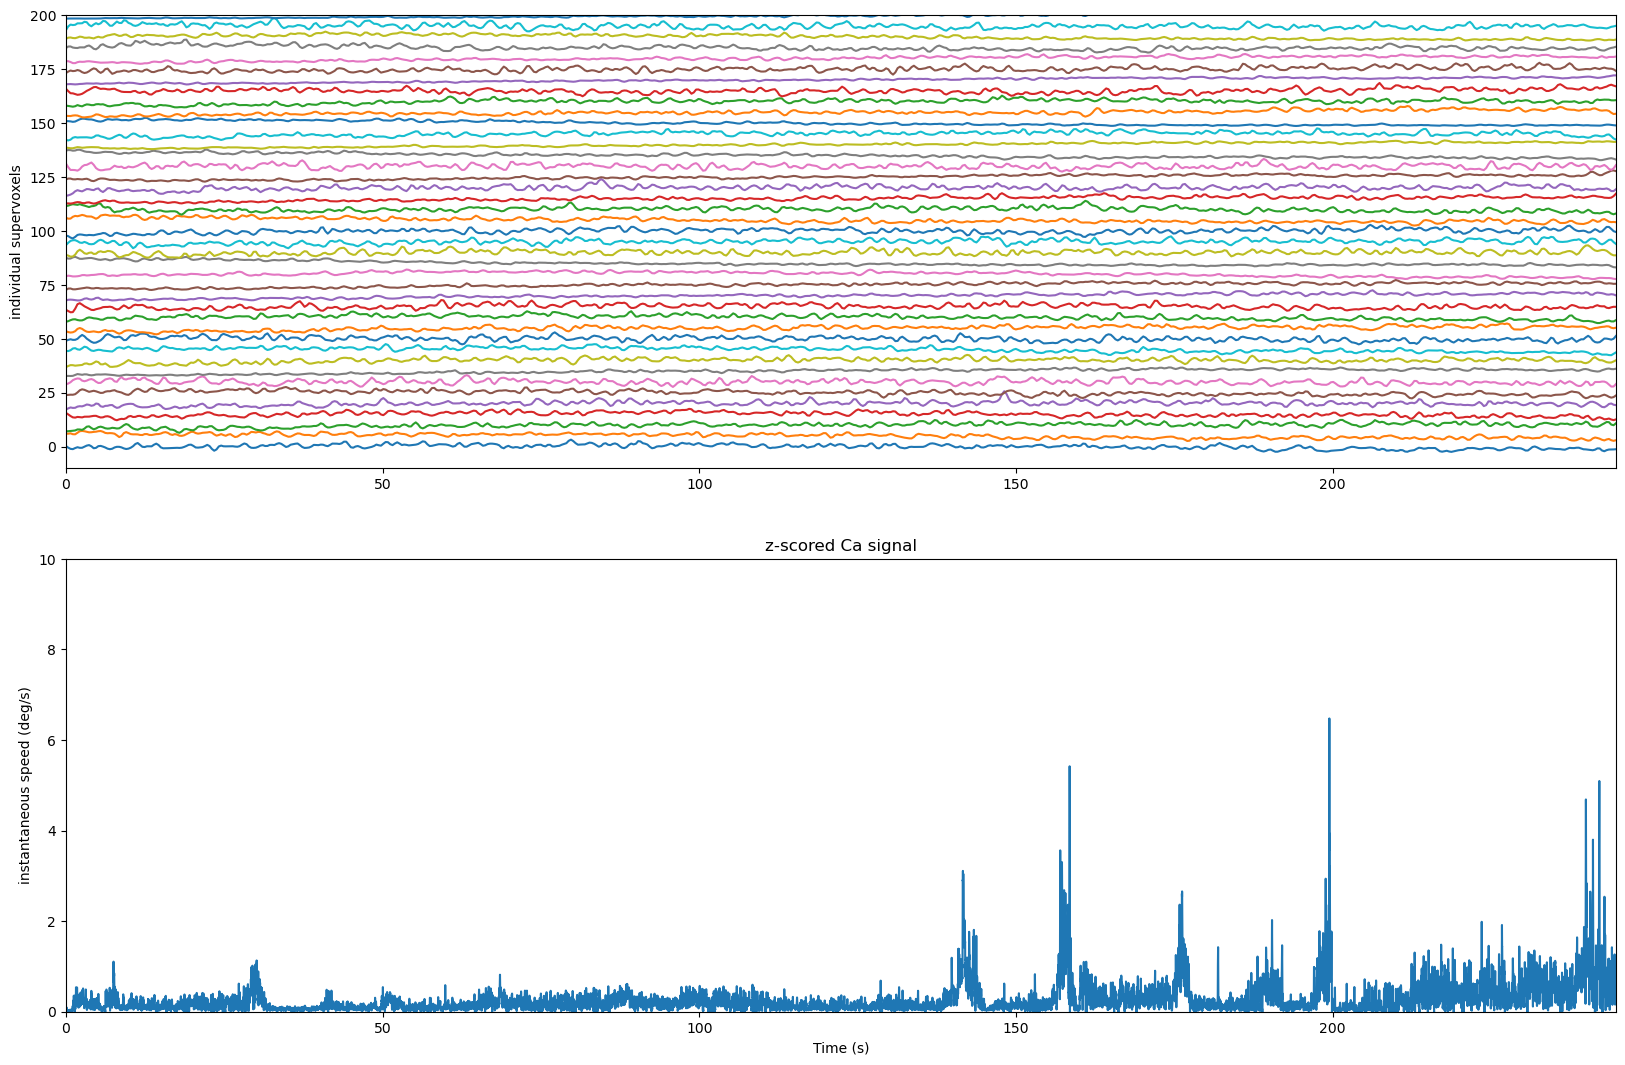

In [31]:
# visualize clusters of one slice
slice_num = 21
brain_size = brain_dim.reshape(-1) # i need this to not be hard coded

cluster_slice = cluster_labels[slice_num].reshape(brain_size[0],brain_size[1]).T
plt.imshow(cluster_slice, cmap='terrain')

#
toplot = ca_signal[slice_num,:,:] + (np.arange(ca_signal.shape[-2])*5)[:,None]
toplot.shape
_ = plt.figure(figsize = [20,20])
plt.subplot(311)
_ = plt.ylim(-10, 200)
_ = plt.xlim(0, max(maui_time))
# _ = plt.title(fr'slice number {slice_num} with mean pearson corr {most_corr}')
_ = plt.plot(maui_time, toplot.T)
_ = plt.ylabel('individual supervoxels')

plt.subplot(312)
plt.plot(fic_time, fictrac_sp)
plt.ylim((0,10))
plt.xlim((0,max(maui_time)))

plt.title('z-scored Ca signal')
plt.ylabel('instantaneous speed (deg/s)')
plt.xlabel('Time (s)')
# plt.savefig(fr'{experiment_path}/rawzCa_{exp_num}.svg')
plt.show()